In [68]:
import numpy as np
import pandas as pd


In [69]:
df=pd.read_csv('winequality-red.csv')

In [70]:
df.shape

(1599, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [72]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [73]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split


In [75]:
X=df.drop(['quality'],axis=1)
Y=df['quality']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=60)


In [76]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [77]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error

In [85]:
lr=LR()
lr.fit(x_train,y_train)
lrpred=lr.predict(x_test)

In [79]:
print("mean_sqr_err :",mean_squared_error(y_test,lrpred))
print("accuracy :",lr.score(x_test,y_test))

mean_sqr_err : 0.41987747080038124
accuracy : 0.38011169247463905


In [80]:
rfr=RFR(n_estimators=102,max_depth=12,max_features='sqrt',bootstrap='false',min_samples_leaf=2)
rfr.fit(x_train,y_train)
rfrpred=rfr.predict(x_test)

In [81]:
print("mean_sqr_err :",mean_squared_error(y_test,lrpred))
print("accuracy :",rfr.score(x_test,y_test))

mean_sqr_err : 0.41987747080038124
accuracy : 0.49861045575403573


In [82]:
import matplotlib.pyplot as plt


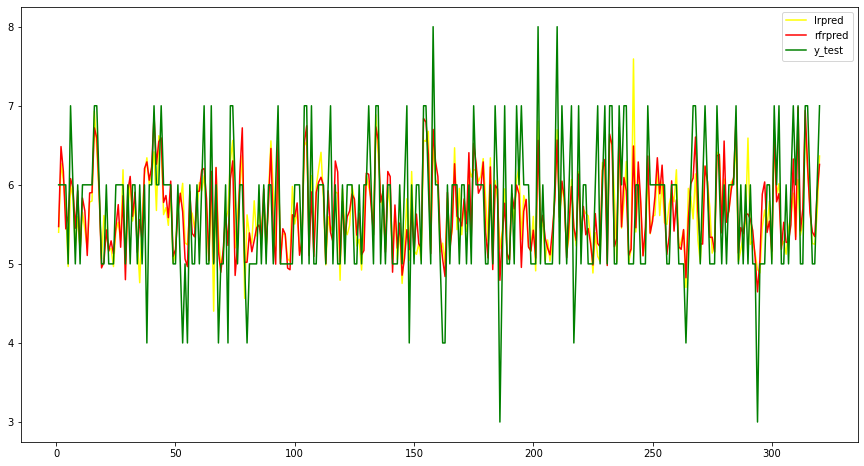

In [89]:
x=np.arange(1,x_test.shape[0]+1)
plt.figure(figsize=(15,8))
plt.plot(x,lrpred,color='yellow',label='lrpred')
plt.plot(x,rfrpred,color='red',label='rfrpred')
plt.plot(x,y_test,color='green',label='y_test')
plt.legend()
plt.show()